### File descriptions
  - sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.

   - test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
    
   - sample_submission.csv - a sample submission file in the correct format.
    
   - items.csv - supplemental information about the items/products.

   - item_categories.csv  - supplemental information about the items categories.

   - shops.csv- supplemental information about the shops.

### Data fields
    
   - ID - an Id that represents a (Shop, Item) tuple within the test set
    
   - shop_id - unique identifier of a shop
    
   - item_id - unique identifier of a product
    
   - item_category_id - unique identifier of item category
    
   - item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
    
   - item_price - current price of an item
    
   - date - date in format dd/mm/yyyy
    
   > date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
    
 > item_name - name of item
    
 > shop_name - name of shop
    
 > item_category_name - name of item category

# modeling



.

### dependency

In [1]:
# !wget --header="Host: doc-0k-08-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en,en-US;q=0.9,la;q=0.8" --header="Cookie: AUTH_lk5fjgpbp18bqieek1pcsgkahe0h7fu9_nonce=gpsgkpq28grs0" --header="Connection: keep-alive" "https://doc-0k-08-docs.googleusercontent.com/docs/securesc/jj451hn0ufa0ajs0a6h05q64j1ja68qm/s2to8qvg5clstgeoj142dl458ur0cqrl/1664485125000/11035158053459451988/11035158053459451988/1pkJqgHDdpHR-IEorEdxr--eG46R8nlRd?e=download&ax=ALW9-sCus1bwkHtqzHFHsroSPfuGgiXkMRqbbjeTUL9FsT-1Z2qqy3eapETxO92w_3emZgZ5DdEKJI1wVAudLeKZsdDcz7jqFnNSI_QoGtWijUtMSiyLSZcLvFjolyeSmm9H8KlbeVtY-vbgp1_8nCRoWdz0Eg_xa5x14l4KNMmtS2r1rPNvpGiAQTAk-yZ6lUdZVcuW6X5HJU4oXyTzITcLc0oEMs5jIhizCJyEb5RiIsBHHMKRxWUyEmIucw4-EIZHoWKum2F9SalLslh5njnHeiU8vVq4pRIMd3EoRpkjBkFSi6zstgSK_mHDarIPrOAtlAG-TM0o_qRDaMcdhmb9wK8UiUrU0N5r_YFOJxOUxGSPhBekDWC7x2LKV7D3YF6hUa_aQisI2nx3C7eWnWpRdU-Dog_2tP7rL1A27s99j4r24NyvS7YsIv8IwvzQqAftnPKen91pomh5dL72VVMw5qZyYPfVYVlcp9A_0oiOXBy_bZlL7zZPTW1bLODWOVOZh1-B5nXbGFFyrh7WMv4czuOz3E0G9-gGQAazApLkj1zVtYG-llLPV2VfNM8ThBggalrakxJboKQK2myt5NmzRuNpSsdhPF0Wxj6RD7UegukUImr6Ev86HLHTS5YlKcAR63OGyfpcA5OTN34YP5rj-kl_ZF5KKHBQBHRHSH9UWLTDonN4WqU8M2BIdIUjJpji95mPio-0y00Nx77nIbLDly4jCQjxUPGcw2rv4SGsd9yYMvMLqxLeS6pY4xPV07YtA8tMlYHVEV4pOE3v7G1AeNCfOMgHzmXmhd1MpTuMBbtXbNYS5x8a1TrHvB3R&uuid=61466b95-bedd-42dc-8dd1-5f2fb8bb875a&authuser=1&nonce=gpsgkpq28grs0&user=11035158053459451988&hash=ek67hk0ee2atuisubh7nrg83do8svhf6" -c -O 'data.pkl'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb 

import time
from itertools import product
import warnings
import pickle
import gc

from sklearn.metrics import mean_squared_error

from tqdm import tqdm

# 1. Data Reading

In [3]:
# !pip3 install pickle5


In [4]:
# import pickle5 as pickle
# with open('/content/data.pkl', "rb") as fh: 
#   data = pickle.load(fh)

In [5]:
data = pd.read_pickle('data.pkl')


In [6]:
data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'ID',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_item_avg_item_cnt_lag_6', 'date_item_avg_item_cnt_lag_12',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 'item_category_id',
       'date_cat_avg_item_cnt_lag_1', 'month', 'days'],
      dtype='object')

In [7]:
data = data[['date_block_num', 'shop_id', 'item_id', 'item_cnt_month',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_item_avg_item_cnt_lag_6', 'date_item_avg_item_cnt_lag_12',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 'item_category_id',
       'date_cat_avg_item_cnt_lag_1', 'month', 'days']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29478600 entries, 15962400 to 45440999
Data columns (total 24 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   date_block_num                 int32  
 1   shop_id                        int32  
 2   item_id                        int32  
 3   item_cnt_month                 float16
 4   item_cnt_month_lag_1           float16
 5   item_cnt_month_lag_2           float16
 6   item_cnt_month_lag_3           float16
 7   item_cnt_month_lag_6           float16
 8   item_cnt_month_lag_12          float16
 9   date_avg_item_cnt_lag_1        float16
 10  date_item_avg_item_cnt_lag_1   float16
 11  date_item_avg_item_cnt_lag_2   float16
 12  date_item_avg_item_cnt_lag_3   float16
 13  date_item_avg_item_cnt_lag_6   float16
 14  date_item_avg_item_cnt_lag_12  float16
 15  date_shop_avg_item_cnt_lag_1   float16
 16  date_shop_avg_item_cnt_lag_2   float16
 17  date_shop_avg_item_cnt_lag_3   float1

In [9]:
data.sample(2)

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1,...,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,item_category_id,date_cat_avg_item_cnt_lag_1,month,days
38575680,28,59,22050,0.0,0.0,1.0,0.0,1.0,0.0,0.057648,...,0.133301,0.047577,0.054321,0.054535,0.072815,0.053589,40,0.035400,4,31
30914703,23,14,9723,0.0,0.0,0.0,0.0,0.0,0.0,0.088745,...,0.000000,0.073181,0.053406,0.057739,0.053009,0.088318,40,0.049103,11,31


### data preprocessing

**one hot encoding**

In [10]:
# creating ohe through dummies value approach
# ref:- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd


bridge_df = data[['shop_id']]

# generate binary values using get_dummies
dum_df = pd.get_dummies(data[['shop_id']], columns=["shop_id"], prefix=["shop_id"] )


# merge with main df bridge_df on key values
# bridge_df = bridge_df.join(dum_df)
# bridge_df.head()

# Bridge_Type values encoded using dummies approach
# Conclusion
# It is important to understand various option for encoding categorical variables because each approach has its own pros and cons. In data science, it is an important step, so I really encourage you to keep these ideas in mind when dealing with categorical variables. For any suggestion or for more details on the code used in this article, feel free to comment.



In [11]:
%%time

# data = data.join(dum_df)

Wall time: 0 ns


In [12]:
data.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1,...,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,item_category_id,date_cat_avg_item_cnt_lag_1,month,days
15962400,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.13623,...,0.0,0.0,0.0,0.0,0.0,0.251709,40,0.094788,0,31
15962401,12,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.13623,...,0.0,0.0,0.0,0.0,0.0,0.251709,76,0.009460,0,31
15962402,12,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.13623,...,0.0,0.0,0.0,0.0,0.0,0.251709,40,0.094788,0,31
15962403,12,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.13623,...,0.0,0.0,0.0,0.0,0.0,0.251709,40,0.094788,0,31
15962404,12,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.13623,...,0.0,0.0,0.0,0.0,0.0,0.251709,40,0.094788,0,31


**Validation strategy -** 

we have 34 month data and based on that we have to pridict next month data.
so in order to make new features we have to remove initial 12 month data,
now we left with 22 month data which is still very large to process in small systems.
so we again remove 8 month data and 

final data is recent 14 month data and based on that  we have to predict next month data for each shop keeper.


- 20-33 months for the train.
- 33 month for the validation set and 
- 34 month for the test set.





In [13]:
# reducing size
data = data[data.date_block_num > 20] 

In [14]:
data.shape

(17506800, 24)

In [15]:
X_train = data[(data.date_block_num > 19)& (data.date_block_num < 33)].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [16]:
X_train.shape, X_valid.shape,X_test.shape

((15962400, 23), (1330200, 23), (214200, 23))

In [17]:
X_train.head()

,date_block_num,shop_id,item_id,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,...,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,item_category_id,date_cat_avg_item_cnt_lag_1,month,days
27934200,21,0,0,0.0,0.0,0.0,0.0,0.0,0.074768,0.016663,...,0.0,0.0,0.0,0.0,0.0,0.0,40,0.042297,9,31
27934201,21,0,1,0.0,0.0,0.0,0.0,0.0,0.074768,0.016663,...,0.0,0.0,0.0,0.0,0.0,0.0,76,0.013367,9,31
27934202,21,0,2,0.0,0.0,0.0,0.0,0.0,0.074768,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,40,0.042297,9,31
27934203,21,0,3,0.0,0.0,0.0,0.0,0.0,0.074768,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,40,0.042297,9,31
27934204,21,0,4,0.0,0.0,0.0,0.0,0.0,0.074768,0.016663,...,0.0,0.0,0.0,0.0,0.0,0.0,40,0.042297,9,31


In [18]:
# del data
gc.collect()

20

# 2. Model training and evalution
 

### 2.1 models and hypertuning

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings

!pip install catboost 
# !pip install lightgbm 

In [20]:
pip --version

pip 20.2.4 from C:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.8)

Note: you may need to restart the kernel to use updated packages.


#### **CatBoostRegressor**

CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks.

**why we choose**

so we have high cardinality categorical data so we are using catBoostRegressor model which will take care of this problem 

**hyperparameter tuning**

In [59]:
%%time
#hyperparameter tuning

 

def tuning_grid_search(params, params2, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in params:
        tr_s = []
        te_s = []
        for j in params2:
            
            clf = CatBoostRegressor(iterations=6,
                              learning_rate=j,
                              depth=i, loss_function='RMSE', )


            clf.fit(x_train, y_train)
            train_sc = mean_squared_error(y_train, clf.predict(x_train))
            test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
            
            tr_s.append(test_sc)
            te_s.append(train_sc)
           
            
            print('depth = ',i,'learning rate =',j, 'train loss- ',train_sc,'Test loss -',test_sc)
            
         
        test_scores.append(tr_s)
        train_scores.append(te_s)
        

    return train_scores, test_scores

    

depths = [3,8,11,13,16]
learning_rate = [.0001, .001, .01, .1, 10 ]

train_scores, test_scores = tuning_grid_search(depths, learning_rate, X_train, Y_train, X_valid, Y_valid)  


0:	learn: 1.5257298	total: 1s	remaining: 5.01s
1:	learn: 1.5256744	total: 1.79s	remaining: 3.59s
2:	learn: 1.5256191	total: 2.59s	remaining: 2.59s
3:	learn: 1.5255636	total: 3.39s	remaining: 1.69s
4:	learn: 1.5255081	total: 4.18s	remaining: 836ms
5:	learn: 1.5254527	total: 4.98s	remaining: 0us
depth =  3 learning rate = 0.0001 train loss-  2.3270058770638262 Test loss - 1.3135068350164396
0:	learn: 1.5252305	total: 938ms	remaining: 4.69s
1:	learn: 1.5246777	total: 1.73s	remaining: 3.46s
2:	learn: 1.5241246	total: 2.52s	remaining: 2.52s
3:	learn: 1.5235724	total: 3.31s	remaining: 1.65s
4:	learn: 1.5230211	total: 4.11s	remaining: 821ms
5:	learn: 1.5224706	total: 4.91s	remaining: 0us
depth =  3 learning rate = 0.001 train loss-  2.3179167079054124 Test loss - 1.3072321086847007
0:	learn: 1.5202528	total: 902ms	remaining: 4.51s
1:	learn: 1.5148132	total: 1.7s	remaining: 3.41s
2:	learn: 1.5094592	total: 2.51s	remaining: 2.51s
3:	learn: 1.5041749	total: 3.29s	remaining: 1.64s
4:	learn: 1.498

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 8.2026698	total: 912ms	remaining: 4.56s
1:	learn: 70.3974538	total: 1.7s	remaining: 3.4s
2:	learn: 610.9439873	total: 2.48s	remaining: 2.48s
3:	learn: 5305.7764945	total: 3.26s	remaining: 1.63s
4:	learn: 46105.1213147	total: 4.03s	remaining: 806ms
5:	learn: 400877.7063201	total: 4.82s	remaining: 0us
depth =  3 learning rate = 10 train loss-  160702935426.60013 Test loss - 137257450577.50526
0:	learn: 1.5257239	total: 1.19s	remaining: 5.95s
1:	learn: 1.5256616	total: 2.25s	remaining: 4.49s
2:	learn: 1.5255994	total: 3.29s	remaining: 3.29s
3:	learn: 1.5255371	total: 4.34s	remaining: 2.17s
4:	learn: 1.5254747	total: 5.42s	remaining: 1.08s
5:	learn: 1.5254136	total: 6.48s	remaining: 0us
depth =  8 learning rate = 0.0001 train loss-  2.3268866243412076 Test loss - 1.313594177159108
0:	learn: 1.5251716	total: 1.18s	remaining: 5.92s
1:	learn: 1.5245492	total: 2.25s	remaining: 4.5s
2:	learn: 1.5239291	total: 3.33s	remaining: 3.33s
3:	learn: 1.5233082	total: 4.41s	remaining: 2.2s
4:	l

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 7.7037606	total: 1.2s	remaining: 5.97s
1:	learn: 58.0871029	total: 2.25s	remaining: 4.5s
2:	learn: 464.5251595	total: 3.31s	remaining: 3.31s
3:	learn: 3827.1055624	total: 4.39s	remaining: 2.19s
4:	learn: 32108.2140999	total: 5.48s	remaining: 1.1s
5:	learn: 272456.8888235	total: 6.53s	remaining: 0us
depth =  8 learning rate = 10 train loss-  74232756265.429 Test loss - 57646355760.85744
0:	learn: 1.5257210	total: 4.34s	remaining: 21.7s
1:	learn: 1.5256583	total: 8.53s	remaining: 17.1s
2:	learn: 1.5255945	total: 12.7s	remaining: 12.7s
3:	learn: 1.5255344	total: 16.9s	remaining: 8.45s
4:	learn: 1.5254700	total: 21.1s	remaining: 4.21s
5:	learn: 1.5254083	total: 25.3s	remaining: 0us
depth =  11 learning rate = 0.0001 train loss-  2.3268705587347496 Test loss - 1.3135765686779166
0:	learn: 1.5251429	total: 4.3s	remaining: 21.5s
1:	learn: 1.5244660	total: 8.48s	remaining: 17s
2:	learn: 1.5238291	total: 12.7s	remaining: 12.7s
3:	learn: 1.5231893	total: 16.9s	remaining: 8.44s
4:	learn

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 7.7249168	total: 4.35s	remaining: 21.7s
1:	learn: 56.5061125	total: 8.51s	remaining: 17s
2:	learn: 441.6569784	total: 12.7s	remaining: 12.7s
3:	learn: 3592.6236016	total: 16.8s	remaining: 8.41s
4:	learn: 29180.4468496	total: 21s	remaining: 4.2s
5:	learn: 239237.3774214	total: 25.1s	remaining: 0us
depth =  11 learning rate = 10 train loss-  57234522755.606575 Test loss - 42545588094.4596
0:	learn: 1.5257215	total: 5.4s	remaining: 27s
1:	learn: 1.5256545	total: 10.7s	remaining: 21.4s
2:	learn: 1.5255938	total: 16s	remaining: 16s
3:	learn: 1.5255328	total: 21.2s	remaining: 10.6s
4:	learn: 1.5254659	total: 26.5s	remaining: 5.3s
5:	learn: 1.5254019	total: 31.8s	remaining: 0us
depth =  13 learning rate = 0.0001 train loss-  2.326850819453299 Test loss - 1.3135565103762907
0:	learn: 1.5251478	total: 5.41s	remaining: 27.1s
1:	learn: 1.5245157	total: 10.6s	remaining: 21.3s
2:	learn: 1.5238797	total: 15.9s	remaining: 15.9s
3:	learn: 1.5232714	total: 21.1s	remaining: 10.6s
4:	learn: 1.5

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 7.4887741	total: 5.42s	remaining: 27.1s
1:	learn: 51.8620469	total: 10.6s	remaining: 21.3s
2:	learn: 392.3132470	total: 15.8s	remaining: 15.8s
3:	learn: 3037.7546510	total: 21s	remaining: 10.5s
4:	learn: 23978.0275836	total: 26.2s	remaining: 5.24s
5:	learn: 197138.0099622	total: 31.4s	remaining: 0us
depth =  13 learning rate = 10 train loss-  38863394971.66725 Test loss - 28240030006.684685
0:	learn: 1.5257228	total: 13.4s	remaining: 1m 6s
1:	learn: 1.5256668	total: 25.6s	remaining: 51.2s
2:	learn: 1.5256056	total: 38.1s	remaining: 38.1s
3:	learn: 1.5255466	total: 51.1s	remaining: 25.6s
4:	learn: 1.5254846	total: 1m 3s	remaining: 12.7s
5:	learn: 1.5254230	total: 1m 15s	remaining: 0us
depth =  16 learning rate = 0.0001 train loss-  2.326915342519683 Test loss - 1.3136152216023815
0:	learn: 1.5251601	total: 12.4s	remaining: 1m 2s
1:	learn: 1.5246014	total: 24.7s	remaining: 49.4s
2:	learn: 1.5240252	total: 37.3s	remaining: 37.3s
3:	learn: 1.5234359	total: 49.7s	remaining: 24.8s


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 7.1356199	total: 12.3s	remaining: 1m 1s
1:	learn: 50.7808597	total: 24.5s	remaining: 48.9s
2:	learn: 392.4924760	total: 36.8s	remaining: 36.8s
3:	learn: 3131.6455926	total: 48.8s	remaining: 24.4s
4:	learn: 25376.6795003	total: 1m 1s	remaining: 12.2s
5:	learn: 208351.2806389	total: 1m 13s	remaining: 0us
depth =  16 learning rate = 10 train loss-  43410256144.785515 Test loss - 37510532406.301094
CPU times: user 1h 48min 30s, sys: 7min 14s, total: 1h 55min 44s
Wall time: 1h 17min 11s


**we have seen**

learning = [0.1] and depth = [11, 16] seem more appropiate for giving good accuracy

so as next step we try to find which is better

In [64]:
%%time
#hyperparameter tuning
from catboost import CatBoostRegressor

 

def tuning_grid_search(params, params2, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in params:
        tr_s = []
        te_s = []
        for j in params2:
            
            clf = CatBoostRegressor(iterations=50,
                              learning_rate=j,
                              depth=i, loss_function='RMSE', )


            clf.fit(x_train, y_train)
            train_sc = mean_squared_error(y_train, clf.predict(x_train))
            test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
            
            tr_s.append(test_sc)
            te_s.append(train_sc)
           
            
            print('depth = ',i,'learning rate =',j, 'train loss- ',train_sc,'Test loss -',test_sc)
            
         
        test_scores.append(tr_s)
        train_scores.append(te_s)
        

    return train_scores, test_scores

    

depths = [11,12,15,16]
learning_rate = [.01, 0.1 ]

train_scores, test_scores = tuning_grid_search(depths, learning_rate, X_train, Y_train, X_valid, Y_valid)  


0:	learn: 1.5193716	total: 4.29s	remaining: 3m 30s
1:	learn: 1.5126779	total: 8.56s	remaining: 3m 25s
2:	learn: 1.5063812	total: 12.8s	remaining: 3m 20s
3:	learn: 1.4999730	total: 17s	remaining: 3m 15s
4:	learn: 1.4941605	total: 21.2s	remaining: 3m 11s
5:	learn: 1.4883180	total: 25.5s	remaining: 3m 6s
6:	learn: 1.4823206	total: 29.7s	remaining: 3m 2s
7:	learn: 1.4763986	total: 33.9s	remaining: 2m 58s
8:	learn: 1.4708026	total: 38.1s	remaining: 2m 53s
9:	learn: 1.4646992	total: 42.3s	remaining: 2m 49s
10:	learn: 1.4591598	total: 46.5s	remaining: 2m 45s
11:	learn: 1.4533998	total: 50.8s	remaining: 2m 40s
12:	learn: 1.4474824	total: 55s	remaining: 2m 36s
13:	learn: 1.4419153	total: 59.3s	remaining: 2m 32s
14:	learn: 1.4364083	total: 1m 3s	remaining: 2m 28s
15:	learn: 1.4310370	total: 1m 7s	remaining: 2m 23s
16:	learn: 1.4258038	total: 1m 11s	remaining: 2m 19s
17:	learn: 1.4206970	total: 1m 16s	remaining: 2m 15s
18:	learn: 1.4159228	total: 1m 20s	remaining: 2m 11s
19:	learn: 1.4107646	tota

**observation**:


finally we get best depth  = 16 and learning_rate = 0.1 which is giving train_loss = 0.6809 and test_loss = 0.6872


In [ ]:
# depth =  16 learning rate = 0.1 train loss-  1.5365319786068083 Test loss - 0.957646089626013
# depth =  11 learning rate = 0.1 train loss-  0.7408490019386933 Test loss - 0.781272587790982
# depth =  15 learning rate = 0.1 train loss-  0.6869165184971195 Test loss - 0.7465221010258248
# depth =  12 learning rate = 0.1 train loss-  0.7201806329016283 Test loss - 0.7738442584965375
#depth =  16 learning rate = 0.1 train loss-  0.6809574905647325 Test loss - 0.6872091048480419



##### **CatBoostReg model define**

In [ ]:

# loading the pickled model
# cat_boost_model = load('cat_boost_model.joblib')

In [21]:
%%time
from catboost import CatBoostRegressor
# ref: https://catboost.ai/en/docs/concepts/python-usages-examples


cat_boost_model = CatBoostRegressor(iterations=80,
                          learning_rate=0.1,
                          depth=16, loss_function='RMSE')
# depth =  11 learning rate = 0.1 train loss-  1.273804987740196 Test loss - 0.7666459548684269

# Fit model
cat_boost_model.fit(X_train,Y_train)
# Get predictions
y_pred_tr = cat_boost_model.predict(X_train)
y_pred_cv = cat_boost_model.predict(X_valid)


0:	learn: 1.4642292	total: 23.7s	remaining: 31m 15s
1:	learn: 1.4111833	total: 46s	remaining: 29m 54s
2:	learn: 1.3624468	total: 1m 9s	remaining: 29m 40s
3:	learn: 1.3158192	total: 1m 31s	remaining: 29m 5s
4:	learn: 1.2751147	total: 1m 49s	remaining: 27m 26s
5:	learn: 1.2395693	total: 2m 7s	remaining: 26m 12s
6:	learn: 1.2064781	total: 2m 24s	remaining: 25m 11s
7:	learn: 1.1774541	total: 2m 42s	remaining: 24m 18s
8:	learn: 1.1495533	total: 2m 59s	remaining: 23m 34s
9:	learn: 1.1216385	total: 3m 16s	remaining: 22m 56s
10:	learn: 1.1009344	total: 3m 33s	remaining: 22m 20s
11:	learn: 1.0801389	total: 3m 50s	remaining: 21m 46s
12:	learn: 1.0606835	total: 4m 7s	remaining: 21m 14s
13:	learn: 1.0431130	total: 4m 24s	remaining: 20m 45s
14:	learn: 1.0234888	total: 4m 40s	remaining: 20m 17s
15:	learn: 1.0107478	total: 4m 57s	remaining: 19m 51s
16:	learn: 1.0011364	total: 5m 14s	remaining: 19m 25s
17:	learn: 0.9877397	total: 5m 31s	remaining: 19m
18:	learn: 0.9776732	total: 5m 48s	remaining: 18m 

In [22]:
%%time
rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv 

Wall time: 764 ms


(0.6030562434372128, 0.6998912867544851)

#### **lightgbm**

In [ ]:
# if you are using GPU
# !pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"


In [61]:
%%time

#hyperparameter tuning
warnings.filterwarnings("ignore")

 
def tuning_grid_search(parameters,num_leaves,  x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in parameters:
      tr_s = []
      te_s = []
      for j in  num_leaves:  
          params1 = {'task': 'train', 'boosting': 'gbdt','objective': 'regression',
                      'num_leaves': j,'metric': "rmse",
                      'verbose': -1, 'learning_rate': i, "num_iterations":20,
                    "early_stopping_rounds ":10,
                    } 
          # pdb.set_trace()
          clf = lgb.train(params1,
                    train_set=lgb.Dataset(x_train, y_train),
                    valid_sets=lgb.Dataset(x_cv, y_cv),
                    early_stopping_rounds=10)

          train_sc = mean_squared_error(y_train, clf.predict(x_train))
          test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
          
          te_s.append(test_sc)
          tr_s.append(train_sc)
          
          print('learning rate = ',i, 'num_leaves :',j ,'train_loss- ',train_sc,'Test_loss -',test_sc)
      train_scores.append(tr_s)
      test_scores.append(te_s)
        
    
    return train_scores, test_scores 
    

alphas = [.0001, .001, .01, .1, 1, 10] 
num_leaves = [5, 10, 30, 50]

train_scores, test_scores = tuning_grid_search(alphas,num_leaves, X_train,Y_train, X_valid, Y_valid) 



[1]	valid_0's rmse: 1.14635
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 1.14631
[3]	valid_0's rmse: 1.14628
[4]	valid_0's rmse: 1.14624
[5]	valid_0's rmse: 1.1462
[6]	valid_0's rmse: 1.14616
[7]	valid_0's rmse: 1.14613
[8]	valid_0's rmse: 1.14609
[9]	valid_0's rmse: 1.14605
[10]	valid_0's rmse: 1.14602
[11]	valid_0's rmse: 1.14598
[12]	valid_0's rmse: 1.14594
[13]	valid_0's rmse: 1.1459
[14]	valid_0's rmse: 1.14587
[15]	valid_0's rmse: 1.14583
[16]	valid_0's rmse: 1.14579
[17]	valid_0's rmse: 1.14575
[18]	valid_0's rmse: 1.14572
[19]	valid_0's rmse: 1.14568
[20]	valid_0's rmse: 1.14564
Did not meet early stopping. Best iteration is:
[20]	valid_0's rmse: 1.14564
learning rate =  0.0001 num_leaves : 5 train_loss-  2.324508196868794 Test_loss - 1.3124957530371393
[1]	valid_0's rmse: 1.14634
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 1.1463
[3]	valid_0's rmse: 1.14626
[4]	valid_0's rmse: 1.14621
[5]	valid_0's rmse

**we have seen**

learning = [0.1, 1] and num_leaves = [5, 10] seem more appropiate for giving good accuracy. 

so as next step we try to find which is better 

In [63]:
%%time
# experiment

#hyperparameter tuning
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

 
def tuning_grid_search(parameters,num_leaves,  x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in parameters:
      tr_s = []
      te_s = []
      for j in  num_leaves:  
          params1 = {'task': 'train', 'boosting': 'gbdt','objective': 'regression',
                      'num_leaves': j,'metric': "rmse",
                      'verbose': -1, 'learning_rate': i, "num_iterations":50,
                    "early_stopping_rounds ":10,
                    } 
          # pdb.set_trace()
          clf = lgb.train(params1,
                    train_set=lgb.Dataset(x_train, y_train),
                    valid_sets=lgb.Dataset(x_cv, y_cv),
                    early_stopping_rounds=10)

          train_sc = mean_squared_error(y_train, clf.predict(x_train))
          test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
          
          te_s.append(test_sc)
          tr_s.append(train_sc)
          
          print('learning rate = ',i, 'num_leaves :',j ,'train_loss- ',train_sc,'Test_loss -',test_sc)
      train_scores.append(tr_s)
      test_scores.append(te_s)
        
    
    return train_scores, test_scores 
    
# perform tuning in range of .01-1 and 5-12 
alphas = [.01 ,0.1, 1] 
num_leaves = [5, 8, 10, 12]

train_scores, test_scores = tuning_grid_search(alphas,num_leaves, X_train,Y_train, X_valid, Y_valid) 



[1]	valid_0's rmse: 1.14266
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 1.13901
[3]	valid_0's rmse: 1.13539
[4]	valid_0's rmse: 1.13186
[5]	valid_0's rmse: 1.1284
[6]	valid_0's rmse: 1.12497
[7]	valid_0's rmse: 1.12163
[8]	valid_0's rmse: 1.11832
[9]	valid_0's rmse: 1.1151
[10]	valid_0's rmse: 1.11191
[11]	valid_0's rmse: 1.10881
[12]	valid_0's rmse: 1.10457
[13]	valid_0's rmse: 1.10162
[14]	valid_0's rmse: 1.09759
[15]	valid_0's rmse: 1.09472
[16]	valid_0's rmse: 1.09195
[17]	valid_0's rmse: 1.0881
[18]	valid_0's rmse: 1.0843
[19]	valid_0's rmse: 1.08171
[20]	valid_0's rmse: 1.07813
[21]	valid_0's rmse: 1.07565
[22]	valid_0's rmse: 1.07217
[23]	valid_0's rmse: 1.06971
[24]	valid_0's rmse: 1.06637
[25]	valid_0's rmse: 1.06314
[26]	valid_0's rmse: 1.06093
[27]	valid_0's rmse: 1.05875
[28]	valid_0's rmse: 1.05569
[29]	valid_0's rmse: 1.05263
[30]	valid_0's rmse: 1.04968
[31]	valid_0's rmse: 1.04678
[32]	valid_0's rmse: 1.04397
[33]	valid_0's rmse: 1.

In [71]:
# plt.plot(alphas, test_scores, label='Test loss')
# plt.plot(alphas, train_scores, label='train loss')
# plt.xlabel('alpha')
# plt.ylabel('loss / RMSE score')
# plt.legend()
# plt.title('Alpha vs loss')
# plt.show()

In [ ]:
# learning rate =  0.1 num_leaves : 10 train_loss-  1.0840924745202376 Test_loss - 0.8484926173609901
# learning rate =  0.1 num_leaves : 5 train_loss-  1.1966258538021968 Test_loss - 0.7734191215571788
# learning rate =  1 num_leaves : 5 train_loss-  1.157014341315811 Test_loss - 0.7886864795765637
# learning rate =  1 num_leaves : 10 train_loss-  1.1047743968786896 Test_loss - 0.9570119770582621

# learning rate =  0.1 num_leaves : 5 train_loss-  1.1966258538021968 Test_loss - 0.7734191215571788
# learning rate =  1 num_leaves : 5 train_loss-  1.157014341315811 Test_loss - 0.7886864795765637
# learning rate =  0.1 num_leaves : 8 train_loss-  1.1417026102111192 Test_loss - 0.7942357505819978



##### **lgm model define**

In [34]:
%%time
# warnings.filterwarnings("ignore")

#https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html
# defining parameters 
params = {'task': 'train', 'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 5,
    'learning_rage': 0.1, 
    'metric': "rmse",
    'verbose': 0,  
    "num_iterations":100,
    "early_stopping_rounds ":10,
}
 

model_lgm = lgb.train(params,
                 train_set=lgb.Dataset(X_train, Y_train),
                 valid_sets=lgb.Dataset(X_valid, Y_valid),
                 early_stopping_rounds=10)

y_pred_tr = model_lgm.predict(X_train)
y_pred_cv = model_lgm.predict(X_valid)


[1]	valid_0's rmse: 1.11064
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 1.08107
[3]	valid_0's rmse: 1.04761
[4]	valid_0's rmse: 1.02021
[5]	valid_0's rmse: 0.99968
[6]	valid_0's rmse: 0.984745
[7]	valid_0's rmse: 0.97279
[8]	valid_0's rmse: 0.957709
[9]	valid_0's rmse: 0.946613
[10]	valid_0's rmse: 0.939032
[11]	valid_0's rmse: 0.919915
[12]	valid_0's rmse: 0.911961
[13]	valid_0's rmse: 0.904799
[14]	valid_0's rmse: 0.894551
[15]	valid_0's rmse: 0.892776
[16]	valid_0's rmse: 0.88776
[17]	valid_0's rmse: 0.882963
[18]	valid_0's rmse: 0.882864
[19]	valid_0's rmse: 0.880677
[20]	valid_0's rmse: 0.879443
[21]	valid_0's rmse: 0.884349
[22]	valid_0's rmse: 0.882296
[23]	valid_0's rmse: 0.882219
[24]	valid_0's rmse: 0.882124
[25]	valid_0's rmse: 0.882242
[26]	valid_0's rmse: 0.884775
[27]	valid_0's rmse: 0.883516
[28]	valid_0's rmse: 0.881823
[29]	valid_0's rmse: 0.881402
[30]	valid_0's rmse: 0.88228
Early stopping, best iteration is:
[20]	valid_0's rmse:

In [35]:
rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

(1.1966258538021968, 0.7734191215571788)

#### **linear regression**

In [ ]:
%%time
# hyper-tuning

model1 = LinearRegression(normalize=True, n_jobs = -1)
model1 = model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

Wall time: 25.4 s


(0.9990554518314144, 0.9990554518314144)

In [ ]:
%%time
# linear regression

model1 = LinearRegression(n_jobs = -1)
model1 = model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_valid,y_pred_cv)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

Wall time: 28.8 s


(0.9990554518314214, 0.9990554518314214)

RMSE score is - 0.9990554518314214


#### lasso regression

alpha =  1e-05 train loss-  1.258680252784893 Test loss - 0.9991066308122567
alpha =  0.001 train loss-  1.2588801555519442 Test loss - 1.0000808567226758
alpha =  0.01 train loss-  1.2601328358991566 Test loss - 0.9996585961166279
alpha =  0.1 train loss-  1.267467172682333 Test loss - 0.9793637283407799
alpha =  1 train loss-  1.8371972877790188 Test loss - 1.1102721296380125
alpha =  10 train loss-  2.3279871096695297 Test loss - 1.3142389226677074


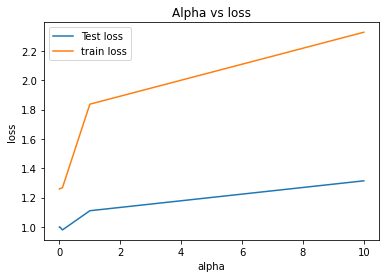

Wall time: 3min 10s


In [ ]:
%%time
#hyperparameter tuning


 

def tuning_grid_search(params, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in params:

    #ref :- https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost    

        clf = linear_model.Lasso(alpha=i)


        clf.fit(x_train, y_train)
        train_sc = mean_squared_error(y_train, clf.predict(x_train))
        test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
        
        test_scores.append(test_sc)
        train_scores.append(train_sc)
        
        print('alpha = ',i,'train loss- ',train_sc,'Test loss -',test_sc)
        
    plt.plot(params, test_scores, label='Test loss')
    plt.plot(params, train_scores, label='train loss')
    plt.xlabel('alpha')
    plt.ylabel('loss')
    plt.legend()
    plt.title('Alpha vs loss')
    plt.show()

    

alphas = [.00001,.001,.01,.1,1,10]

tuning_grid_search(alphas, X_train,Y_train, X_valid, Y_valid)  


In [ ]:
%%time

model1 = linear_model.Lasso(alpha=0.1, normalize=True)
model1 = model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

Wall time: 25.5 s


(1.267467172682333, 0.9793637283407799)

RMSE - 0.9793637283407799

#### SVM - support vectoc machine

In [ ]:
%%time
#taking too much time more than an hour

model1 = SVR(kernel='rbf', gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, max_iter = 1000)
model1 = model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Wall time: 1h 4min 11s


(597.2632940816909, 597.0203403491455)

#### Decision tree

depth =  3 train loss-  1.2417953953305814 Test loss - 0.799148007105698
depth =  8 train loss-  0.7070071021182837 Test loss - 1.5279043311321843
depth =  11 train loss-  0.5996026905155506 Test loss - 1.6849922364383259
depth =  35 train loss-  0.015569065983767559 Test loss - 2.233207549288562
depth =  50 train loss-  0.0003687033612654283 Test loss - 2.4197958676001003
depth =  100 train loss-  0.0 Test loss - 2.0139903773868593
depth =  300 train loss-  0.0 Test loss - 1.530063148398737


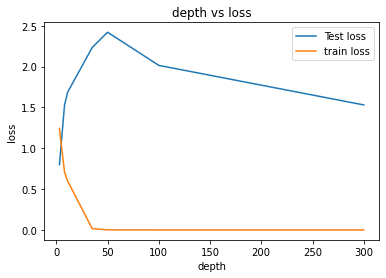

Wall time: 1h 10min 6s


In [ ]:
%%time
# hypertuning 

 

def tuning_grid_search(depths, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in depths:

    #ref :- https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost    

        clf = DecisionTreeRegressor(max_depth=i)


        clf.fit(x_train, y_train)
        train_sc = mean_squared_error(y_train, clf.predict(x_train))
        test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
        
        test_scores.append(test_sc)
        train_scores.append(train_sc)
        
        print('depth = ',i,'train loss- ',train_sc,'Test loss -',test_sc)
        
    plt.plot(depths, test_scores, label='Test loss')
    plt.plot(depths, train_scores, label='train loss')
    plt.xlabel('depth')
    plt.ylabel('loss')
    plt.legend()
    plt.title('depth vs loss')
    plt.show()

    

depths = [3,8,11,35,50,100,300]

tuning_grid_search(depths, X_train,Y_train, X_valid, Y_valid)  


depth =  3 train loss-  0.03869342955946474 Test loss - 1.5539900015035333
depth =  8 train loss-  0.23962515617057195 Test loss - 2.1072155705533855
depth =  11 train loss-  0.32165760559139406 Test loss - 1.0873333156357308
depth =  35 train loss-  0.6432125050754316 Test loss - 1.2056949758108486
depth =  50 train loss-  0.7333448295397805 Test loss - 0.9725651943579494
depth =  100 train loss-  0.9840891750169954 Test loss - 1.2863241497903504
depth =  300 train loss-  1.0953927411726634 Test loss - 1.2543089267463254


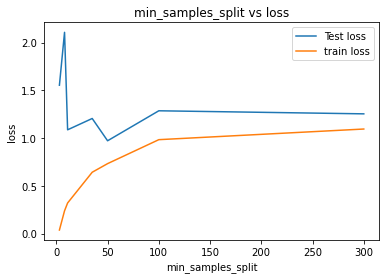

Wall time: 42min 48s


In [ ]:
%%time
# hypertuning 

 

def tuning_grid_search(depths, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in depths:

    #ref :- https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost    

        clf = DecisionTreeRegressor( min_samples_split = i)


        clf.fit(x_train, y_train)
        train_sc = mean_squared_error(y_train, clf.predict(x_train))
        test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
        
        test_scores.append(test_sc)
        train_scores.append(train_sc)
        
        print('depth = ',i,'train loss- ',train_sc,'Test loss -',test_sc)
        
    plt.plot(depths, test_scores, label='Test loss')
    plt.plot(depths, train_scores, label='train loss')
    plt.xlabel('min_samples_split')
    plt.ylabel('loss')
    plt.legend()
    plt.title('min_samples_split vs loss')
    plt.show()

    

min_samples_split = [3,8,11,35,50,100,300]

tuning_grid_search(min_samples_split, X_train,Y_train, X_valid, Y_valid)  


In [ ]:
%%time

model1 = DecisionTreeRegressor(max_depth=3)
model1 = model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

Wall time: 4min 20s


(1.2417953953305814, 0.799148007105698)

RMSE : 0.799148007105698

#### **Gradient Boosting Regressor**

In [ ]:
%%time
# take too much time =2hr

model1 = GradientBoostingRegressor(max_depth=6)
model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

Wall time: 2h 15min 13s


(0.5556420062919477, 1.4175363322281418)

RMSE score for train and test - (0.5556420062919477, 1.4175363322281418)

#### Random Forest 

In [ ]:
%%time
#takes too much time - 4hr

model1 = RandomForestRegressor(max_depth=15, n_estimators=100)
model1.fit(X_train,Y_train)

y_pred_tr = model1.predict(X_train)
y_pred_cv = model1.predict(X_valid)

rmse_tr = mean_squared_error(Y_train,y_pred_tr)
rmse_cv = mean_squared_error(Y_valid,y_pred_cv)

rmse_tr, rmse_cv

Wall time: 4h 49min 14s


(0.5303024748926942, 1.1066976794071)

RMSE score for train and test - (0.5303024748926942, 1.1066976794071)

#### **XGBregressor**

depth =  3 train loss-  1.4981037 Test loss - 0.9016133
depth =  8 train loss-  1.0712739 Test loss - 0.946457
depth =  11 train loss-  1.0165057 Test loss - 0.9708074
depth =  15 train loss-  0.9887715 Test loss - 0.95144314
depth =  20 train loss-  0.96373045 Test loss - 0.96475166
depth =  35 train loss-  0.9404732 Test loss - 0.94935405
depth =  50 train loss-  0.93399835 Test loss - 0.9682277
depth =  70 train loss-  0.934734 Test loss - 0.9745881
depth =  130 train loss-  0.93934023 Test loss - 0.95626223


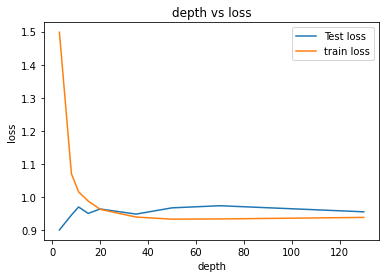

Wall time: 3h 20min 43s


In [ ]:
%%time
# hypertuning 


 

def tuning_grid_search(depths, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in depths:

    #ref :- https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost    

        clf = XGBRegressor(max_depth=i,
                            n_estimators=100,
                            min_child_weight=300, 
                            colsample_bytree=0.8, 
                            subsample=0.8, 
                            eta=0.3,    
                            seed=42)


        clf.fit(x_train, y_train)
        train_sc = mean_squared_error(y_train, clf.predict(x_train))
        test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
        
        test_scores.append(test_sc)
        train_scores.append(train_sc)
        
        print('depth = ',i,'train loss- ',train_sc,'Test loss -',test_sc)
        
    plt.plot(depths, test_scores, label='Test loss')
    plt.plot(depths, train_scores, label='train loss')
    plt.xlabel('depth')
    plt.ylabel('loss')
    plt.legend()
    plt.title('depth vs loss')
    plt.show()

    

depths = [3,8,11,15,20,35,50,70,130]

tuning_grid_search(depths, X_train,Y_train, X_valid, Y_valid)  


In [ ]:
%%time
# hypertuning 


 

def tuning_grid_search(params, x_train, y_train, x_cv, y_cv):
    
    train_scores = []
    test_scores = []
    for i in params:

    #ref :- https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost    

        clf = XGBRegressor(max_depth=35,
                            n_estimators=i,
                            min_child_weight=300, 
                            colsample_bytree=0.8, 
                            subsample=0.8, 
                            eta=0.3,    
                            seed=42)


        clf.fit(x_train, y_train)
        train_sc = mean_squared_error(y_train, clf.predict(x_train))
        test_sc = mean_squared_error(y_cv, clf.predict(x_cv))
        
        test_scores.append(test_sc)
        train_scores.append(train_sc)
        
        print('n_estimators = ',i,'train loss- ',train_sc,'Test loss -',test_sc)
        
    plt.plot(params, test_scores, label='Test loss')
    plt.plot(params, train_scores, label='train loss')
    plt.xlabel('n_estimators')
    plt.ylabel('loss')
    plt.legend()
    plt.title('n_estimators vs loss')
    plt.show()

    

n_estimators = [50,100,150,200,300,500]

tuning_grid_search(n_estimators, X_train,Y_train, X_valid, Y_valid)  


n_estimators =  50 train loss-  1.1115612 Test loss - 0.91820735
n_estimators =  100 train loss-  0.9404732 Test loss - 0.94935405
n_estimators =  150 train loss-  0.84069157 Test loss - 1.0640174
n_estimators =  200 train loss-  0.77348435 Test loss - 1.136252


In [ ]:
%%time
# reference - https://www.kaggle.com/code/dlarionov/feature-engineering-xgboost#Part-2,-xgboost

model = XGBRegressor(max_depth=35,
    n_estimators=100, min_child_weight=300, 
    colsample_bytree=0.8, subsample=0.8, 
    eta=0.3, seed=42)

model = model.fit( X_train,Y_train, eval_metric="rmse",
                  eval_set=[(X_valid, Y_valid)], verbose=False, early_stopping_rounds = 10)

# performance matrix
y_pred_tr = model.predict(X_train)
y_pred_cv = model.predict(X_valid)

rmse_tr = mean_squared_error(Y_train, y_pred_tr)
rmse_cv = mean_squared_error(Y_valid, y_pred_cv)
rmse_tr, rmse_cv

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Wall time: 15min 35s


(1.2053633, 0.87703174)

RMSE score is - 0.87703174

**feature importance**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

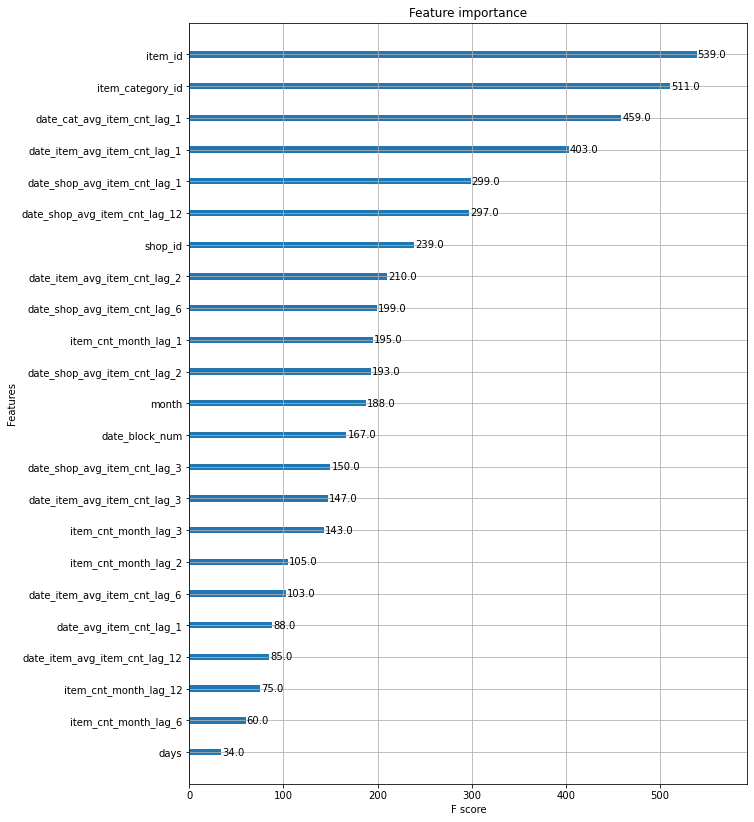

In [ ]:
from xgboost import plot_importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)



plot_features(model, (10,14))

### 2.2 performances of all model 

In [30]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable([ "index","Model", "Hyper Parameter","Train RMSE"," Test RMSE" ])
  
# Add rows
myTable.add_rows(
    [
         
[ "1","linear regression", " No Parameter ","0.99905","0.99905\n" ],
[ "2","lasso regression", "{alpha = 0.1, max_iter=1000, \n tol=0.0001,}","1.26746","0.97936" ],
[ "3","SVM", "{C = 1, max_iter=1000, epsilon = 0.1 \n tol=0.0001,}","597.26329","597.02034" ],
[ "3","Decision Tree", "{'max_depth': 3, 'min_samples_split': 2}\n","1.24179","0.79914" ],
[ "4","Gradient Boosting Regressor", "{'max_depth': 6 }\n","0.55564","1.41753" ],
[ "5","Random Forest", "{'max_depth': 15 '}\n","no","no" ],
[ "6","XGBregressor", "{'max_depth': 16,  n_estimators=200, \nmin_child_weight=300, \nsubsample=0.8,eta=0.3}\n","1.2053633","0.87703174" ],
[ "7","CatBoostRegressor", "{'max_depth': 2, learning rate =.1,\n iteration= 80}\n","0.6030","0.6998" ],
[ "8","lightgbm", "{'leraning rate': .1, num_leaves=5, \n num_iterations : 100","1.1966","0.7734" ],
      

    ]
)

print(myTable)

+-------+-----------------------------+------------------------------------------+------------+------------+
| index |            Model            |             Hyper Parameter              | Train RMSE |  Test RMSE |
+-------+-----------------------------+------------------------------------------+------------+------------+
|   1   |      linear regression      |               No Parameter               |  0.99905   |  0.99905   |
|       |                             |                                          |            |            |
|   2   |       lasso regression      |      {alpha = 0.1, max_iter=1000,        |  1.26746   |  0.97936   |
|       |                             |               tol=0.0001,}               |            |            |
|   3   |             SVM             |  {C = 1, max_iter=1000, epsilon = 0.1    | 597.26329  | 597.02034  |
|       |                             |               tol=0.0001,}               |            |            |
|   3   |        De

**conclusion** :
- lightgbm, catBoostRegressor are working good 
- overall best performance is 0.6998 rmse loss by catBoostRegressor and it's still faster to train


In [17]:
# dumping file
from joblib import dump, load
# dump(cat_boost_model,'cat_boost_model.joblib')
# or
# pickle.dump(cat_boost_model, open('cat_boost_model.pkl', 'wb'))
# pickled_model = pickle.load(open('model.pkl', 'rb'))

# loading the pickled model
best_model = load('cat_boost_model.joblib')

# 3. Final Deployment 

now we will create fun  which takes shop_id as input(either sigle or multiple),
  than add features based on past 12 month data(1x22k)
  
  then predict regression value for all items corresponding to the shop, return values which are greater 
  than 0, 

In [16]:
# defining best model 
# best_model = cat_boost_model
# cat_boost_model.save_weights("cat_boost_model.h5")

### 3.1 Reading item data and matrix

In [26]:
# loading item data
items = pd.read_csv("items.csv")
 
#loading matrix of 'date_block_num, shop_id, item_id and item_cnt_month ' pair for 34 month
matrix = pd.read_pickle('matrix.pkl')
matrix = matrix.drop('ID', axis=1)
# matrix.sample()

### 3.2 Featurization for raw input

In [40]:
%%time

def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]] 
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df


def mean_encoding_item (matrix):
    group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_item_avg_item_cnt']
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
    matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
    matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
    
    return matrix

def mean_encoding_shop (matrix):
    group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_shop_avg_item_cnt' ]
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
    matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
    matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)
    
    return matrix

def mean_encoding_item_avg_pre_month_cnt(matrix):
    # date_avg_item_cnt_lag_1
    group = matrix.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_avg_item_cnt' ]
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
    matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')
    matrix['date_avg_item_cnt_lag_1'] = matrix.date_avg_item_cnt_lag_1.replace(np.nan, 0)
    matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)
    #pdb.set_trace()
    
    return matrix

def mean_encoding_item_cat (matrix, items):
    
    
    matrix = pd.merge(matrix, items, on= 'item_id', how= 'left')
    
    group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_cat_avg_item_cnt' ]
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num','item_category_id'], how='left')
    matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1], 'date_cat_avg_item_cnt')
    matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)
    matrix.drop('item_name', axis=1, inplace= True)
    
    return matrix

    

def date_time_feature(matrix):
    # adding month
    matrix['month'] = matrix['date_block_num'] % 12

    # total number of day on that month
    days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
    matrix['days'] = matrix['month'].map(days).astype(np.int8)
    return matrix
    
# merging all above function and returning data associated to last date_block_num = 34 
def add_features(data, item, date_block):    
    data = lag_feature(data, [1,2,3,6,12], 'item_cnt_month')
    
    data = mean_encoding_item_avg_pre_month_cnt(data)
    data = mean_encoding_item(data)
    data = mean_encoding_shop(data)
    data = mean_encoding_item_cat(data, item)
    data = date_time_feature(data)
    
    
    data = data[data.date_block_num == date_block ] # total 33 month, need only last 12 month  
    return data



# takes raw input and create all possible pair with item and make ready for prediction(like: X_test) 
def create_df_for_test(input1, matrix, items):
    # modifying matrix based on input_shop_id
    data = matrix[matrix.shop_id.isin(input1)]

    # add test data to main matrix
    query_data = pd.DataFrame(product(input1,items.item_id.unique()), columns = ['shop_id', "item_id"])
    query_data['date_block_num'] = 34
    # type casting it as different type of int has different storage
    query_data['date_block_num'] = query_data['date_block_num'].astype(np.int8)
    query_data['shop_id'] = query_data['shop_id'].astype(np.int8)
    query_data['item_id'] = query_data['item_id'].astype(np.int8)
    
    # concat test data to the whole data in order to compute feature
    data = pd.concat([data,query_data],ignore_index=True ,sort=False, keys=['date_block_num','shop_id','item_id'] )
    
    return data



Wall time: 0 ns


### 3.3 final_fun_1()

In [43]:
%%time
def final_fun_1(input_x, clf, matrix, items,date_block):
    
    data = create_df_for_test(input_x, matrix, items)
    
    # need to analysis x_test
    x_featured = add_features(data, items, date_block)
    
    
    if x_featured.shape[1] == 24:
        pred_x = clf.predict(x_featured)
    
    return pred_x, x_featured[['date_block_num','shop_id','item_id']]

# forcasted_items = final_fun_1(input1, best_model, matrix, items, date_block)

Wall time: 29.2 s


In [50]:
len(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_item_avg_item_cnt_lag_6', 'date_item_avg_item_cnt_lag_12',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 'item_category_id',
       'date_cat_avg_item_cnt_lag_1', 'month', 'days']) , input_1 # #item_cnt_month_lag_1 ,

NameError: name 'input_1' is not defined

### 3.4 final_fun_2()

In [6]:
%%time
def final_fun_2(input_x, clf, matrix, items,date_block, labels):
    
    data = create_df_for_test(input_x, matrix, items) # create df by input1 in order to compute its feature
    x_test = add_features(data, items,date_block) # convert raw input to pre-processed with all feature
    
    pred_x = clf.predict(x_test)    
    rmse = mean_squared_error(labels, pred_x)
 
    return rmse

# RMSE_loss = final_fun_2(i, clf, matrix, items, 33, Y_valid)
# RMSE_loss

Wall time: 0 ns


### 3.5 Testing funtion 

#### **3.5.1 testing cv data with both function**

In [29]:
# i = X_valid.shop_id.unique()
# date_block = 33 #time factor
# items
matrix.shape

(45441000, 4)

In [49]:
%%time
pred_cv = final_fun_1(i, best_model, matrix, items, date_block)


Wall time: 15min 56s


In [45]:
%%time
# taking more than 14 min
i = X_valid.shop_id.unique()
date_block = 33 #time factor

pred_cv = final_fun_1(i, best_model, matrix, items, date_block)
print("successfully got pred val now we will check rmse value")
rmse_cv = final_fun_2(i, best_model, matrix, items, 33, Y_valid)

rmse_cv

successfully got pred val now we will check rmse value
Wall time: 18min 24s


0.6998912867544851

#### **3.5.2 Taking shop_id as input from customer**

In [62]:
# taking input 

input1 = [int(x) for x in input("enter shop id for forecasting the demanded items ").split(',')]
print("shop id are :",input1)


enter shop id for forecasting the demanded items 2,4,6
shop id are : [2, 4, 6]


In [61]:
Y_valid

43896600    0.0
43896601    0.0
43896602    0.0
43896603    0.0
43896604    0.0
           ... 
45226795    0.0
45226796    0.0
45226797    0.0
45226798    0.0
45226799    0.0
Name: item_cnt_month, Length: 1330200, dtype: float16

In [47]:
input1

[2, 4, 6]

In [63]:
%%time
date_block = 33 

pred_cv,df = final_fun_1(input1, best_model, matrix, items, date_block)
# for the input we have to consider date_month_block = 33, so that we can get target data from the dataset 

# rmse_cv = final_fun_2(input1, best_model, matrix, items, 33, Y_valid)
# rmse_cv

Wall time: 52.5 s


**visulising the result**

**on custom 'shop_id' got by any user**

In [86]:
# visulising the result 
date_block = 33

df['pred_item_cnt_month'] = pred_cv 
labal = matrix[(matrix.date_block_num==date_block) & (matrix.shop_id.isin(input1))].reset_index(drop=True)

df = pd.merge(df,labal,how ='left', on= ['date_block_num','shop_id','item_id'])
# doing round off for better interpretation
df.pred_item_cnt_month = df.pred_item_cnt_month.round()

df

,date_block_num,shop_id,item_id,pred_item_cnt_month,item_cnt_month_x,item_cnt_month_y,item_cnt_month
0,33,2,0,0.006173,0.0,0.0,0.0
1,33,2,1,0.001882,0.0,0.0,0.0
2,33,2,2,0.006173,0.0,0.0,0.0
3,33,2,3,0.006173,0.0,0.0,0.0
4,33,2,4,0.006173,0.0,0.0,0.0
...,...,...,...,...,...,...,...
66505,33,6,22165,0.027785,0.0,0.0,0.0
66506,33,6,22166,0.025386,0.0,0.0,0.0
66507,33,6,22167,0.266128,1.0,1.0,1.0
66508,33,6,22168,0.025386,0.0,0.0,0.0


**pridicted value vs actual value - plot**

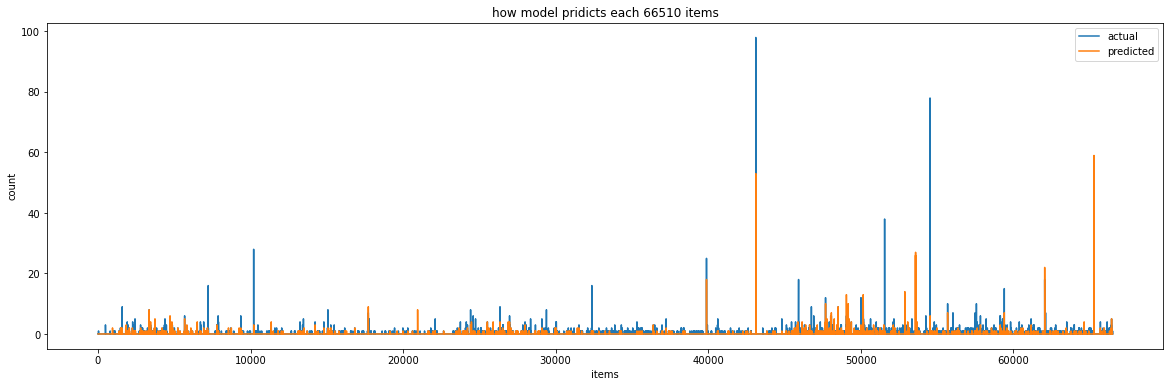

In [87]:
plt.figure(figsize=(20,6))
plt.title("how model pridicts each 66510 items vs actual value")
plt.plot( list(range(66510)), df.item_cnt_month, label="actual")
plt.plot( list(range(66510)), temp, label = "predicted")
plt.xlabel("items")
plt.ylabel("count")
plt.legend()
plt.show()

## test data pridiction

In [20]:
test = pd.read_csv("test.csv")

In [21]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [33]:
uni_item_id = test.item_id.unique()
matrix = matrix[matrix.item_id.isin(uni_item_id)]

In [37]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [139]:
%%time

def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]] 
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    df = df[df.item_id>0]
    return df


def mean_encoding_item (matrix):
    group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_item_avg_item_cnt']
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
    matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
    matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
    
    return matrix

def mean_encoding_shop (matrix):
    group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_shop_avg_item_cnt' ]
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
    matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
    matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)
    
    return matrix

def mean_encoding_item_avg_pre_month_cnt(matrix):
    # date_avg_item_cnt_lag_1
    group = matrix.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_avg_item_cnt' ]
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
    matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')
    matrix['date_avg_item_cnt_lag_1'] = matrix.date_avg_item_cnt_lag_1.replace(np.nan, 0)
    matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)
    #pdb.set_trace()
    
    return matrix

def mean_encoding_item_cat (matrix, items):
    
    
    matrix = pd.merge(matrix, items, on= 'item_id', how= 'left')
    
    group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
    group.columns = [ 'date_cat_avg_item_cnt' ]
    group.reset_index(inplace=True)

    matrix = pd.merge(matrix, group, on=['date_block_num','item_category_id'], how='left')
    matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
    matrix = lag_feature(matrix, [1], 'date_cat_avg_item_cnt')
    matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)
    matrix.drop('item_name', axis=1, inplace= True)
    
    return matrix

    

def date_time_feature(matrix):
    # adding month
    matrix['month'] = matrix['date_block_num'] % 12

    # total number of day on that month
    days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
    matrix['days'] = matrix['month'].map(days).astype(np.int8)
    return matrix
    
# merging all above function and returning data associated to last date_block_num = 34 
def add_features(data, item, date_block):    
    data = lag_feature(data, [1,2,3,6,12], 'item_cnt_month')
    data = mean_encoding_item_avg_pre_month_cnt(data)
#     if data.item_id.unique().size>5100:
#         pdb.set_trace()
        
    data = mean_encoding_item(data)
 
    data = mean_encoding_shop(data)

    data = mean_encoding_item_cat(data, item)

    data = date_time_feature(data)
 
    data = data[data.date_block_num == date_block ] # total 33 month, need only last 12 month  
    return data



# takes raw input and create all possible pair with item and make ready for prediction(like: X_test) 
def create_df_for_test(input1, input2, matrix, items):
    # modifying matrix based on input_shop_id
    matrix = matrix[matrix.shop_id.isin(input1)]
    data = matrix[matrix.item_id.isin(input2)]
    
    # add test data to main matrix
    query_data = pd.DataFrame(product(np.sort(input1),np.sort(input2)), columns = ['shop_id', "item_id"])
    query_data['date_block_num'] = 34
    # type casting it as different type of int has different storage
    query_data['date_block_num'] = query_data['date_block_num'].astype(np.int8)
    query_data['shop_id'] = query_data['shop_id'].astype(np.int8)
    query_data['item_id'] = query_data['item_id'].astype(np.int8)
    
    # concat test data to the whole data in order to compute feature
    data = pd.concat([data,query_data],ignore_index=True ,sort=False, keys=['date_block_num','shop_id','item_id'] )
    
    return data



Wall time: 0 ns


In [140]:
%%time
def final_fun_1(input_x,input_item, clf, matrix, items,date_block):
    
    data = create_df_for_test(input_x,input_item, matrix, items)
    
    # need to analysis x_test
    x_featured = add_features(data, items, date_block)
    
    
    if x_featured.shape[1] == 24:
        pred_x = clf.predict(x_featured)
    
    return pred_x, x_featured[['date_block_num','shop_id','item_id']]

# forcasted_items = final_fun_1(input1, best_model, matrix, items, date_block)

Wall time: 0 ns


In [141]:
final_fun_1(np.array(input_shop_id), np.array(input_item_id), best_model, matrix, items, 34)

KeyboardInterrupt: 

In [65]:
input_shop_id = test.shop_id.unique()
input_item_id = test.item_id.unique()
input_shop_id, input_item_id

(array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
        18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
        35, 38, 34, 46, 41, 44, 39, 45], dtype=int64),
 array([ 5037,  5320,  5233, ..., 15757, 19648,   969], dtype=int64))

In [142]:
pred_val, df = final_fun_1(np.sort(input_shop_id), np.sort(input_item_id), best_model, matrix, items, 34)

df["item_cnt_month"] = pred_val
df = df.drop("date_block_num", axis=1)
df = df.sort_values(by= ["shop_id", "item_id"], ignore_index= True)
df1 = df.round(1)

df1 = df1[df1.shop_id.isin(input_shop_id)]
df1 = df1[df1.item_id.isin(input_item_id)]

In [151]:
df1.shop_id.unique().size, input_shop_id.size, df1.item_id.unique().size, input_item_id.size, 

(42, 42, 5100, 5100)

In [162]:
df1 = df1.groupby(["shop_id", "item_id" ]).agg({"item_cnt_month":np.sum}).reset_index()
df1.head()

,shop_id,item_id,item_cnt_month
0,2,30,2.4
1,2,31,11.5
2,2,32,12.5
3,2,33,10.5
4,2,38,2.2


### **final forecasting value of items of test data**

In [184]:
cocat_df = pd.merge(test, df1, on = ["shop_id", "item_id"], how = "left")
cocat_df.head()

,ID,shop_id,item_id,item_cnt_month
0,0,5,5037,1.1
1,1,5,5320,0.1
2,2,5,5233,1.7
3,3,5,5232,0.7
4,4,5,5268,0.5


In [185]:
final_test_pred = cocat_df.drop(["shop_id", "item_id"], axis =1)
final_test_pred

,ID,item_cnt_month
0,0,1.1
1,1,0.1
2,2,1.7
3,3,0.7
4,4,0.5
...,...,...
214195,214195,0.1
214196,214196,0.1
214197,214197,0.1
214198,214198,0.1


In [188]:
# exporting df into csv file
final_test_pred.to_csv('test_submission1.csv', index=True)

## conclusion




The Best Results were obtained using the CatBoostRegressor. as this model is made for high cardinality categorical data
this model gives us the RMSE loss of 0.6998 on cross-validation (as we don't have target value for a test data).
 
Since this is a Kaggle Problem, the final leaderboard score is 0.75368 
and our rmse value is 0.6998 which is more than that 


...
<!-- 
**rolling window**

in rolling window operation we perform statistic operation on the moving window where
window represent range and statistic operation are mean, median, mode , min, max etc
pandas provide rolling() which provide rolling window calculations gives values at each time stamp.

refer- https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0 -->